In [1]:
import numpy as np
from numpy.random import seed, normal, shuffle
import matplotlib.pyplot as plt

In [47]:
#seed(1643)
nsamples, ndim = 500, 2

# first set of normal random variables with mean -1
inputs1 = normal(loc=1, size=(nsamples, ndim))
target1 = np.zeros((nsamples,2)); target1[:, 0] = 1

# set of normal random variables with mean 1
inputs2 = normal(loc=1, size=(nsamples, ndim))
target2 = np.zeros((nsamples,2)); target2[:, 1] = 1

train_inputs = np.append(inputs1, inputs2, axis=0)
train_target = np.append(target1, target2, axis=0)

data = [(input.reshape(-1,1), target.reshape(-1,1))
              for input, target in zip(train_inputs, train_target)]
shuffle(data)
train_data = data[:800]
test_data = data[800:]

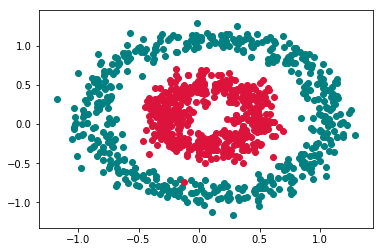

In [48]:
from math import sin, cos
for ix, (x, y) in enumerate(inputs1):
    plt.scatter(cos(ix) + x/10, sin(ix) + y/10, c="teal")
    
for ix, (x, y) in enumerate(inputs2):
    plt.scatter(0.4 * cos(ix) + x/10, 0.4 * sin(ix) + y/10, c="crimson")
plt.show()

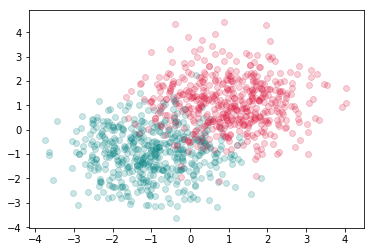

In [3]:
plt.scatter(*inputs1.T.tolist(), color="teal", alpha=0.2)
plt.scatter(*inputs2.T.tolist(), color="crimson", alpha=0.2)
plt.show()

In [8]:
import pickle
with open("train.pkl", "wb") as file:
    pickle.dump(train_data, file)

In [20]:
from neural import NNet
net = NNet([2, 3, 3, 2])
net.SGD(train_data, 30, 10, 1, test_data=test_data)

Epoch 0: 188 / 200
Epoch 1: 188 / 200
Epoch 2: 189 / 200
Epoch 3: 189 / 200
Epoch 4: 188 / 200
Epoch 5: 184 / 200
Epoch 6: 189 / 200
Epoch 7: 185 / 200
Epoch 8: 189 / 200
Epoch 9: 189 / 200
Epoch 10: 186 / 200
Epoch 11: 188 / 200
Epoch 12: 187 / 200
Epoch 13: 187 / 200
Epoch 14: 189 / 200
Epoch 15: 187 / 200
Epoch 16: 188 / 200
Epoch 17: 185 / 200
Epoch 18: 188 / 200
Epoch 19: 188 / 200
Epoch 20: 189 / 200
Epoch 21: 183 / 200
Epoch 22: 188 / 200
Epoch 23: 188 / 200
Epoch 24: 186 / 200
Epoch 25: 185 / 200
Epoch 26: 188 / 200
Epoch 27: 185 / 200
Epoch 28: 183 / 200
Epoch 29: 187 / 200
